<a href="https://colab.research.google.com/github/lucas-c-cardozo/spotify-data-project/blob/main/Relat%C3%B3rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentando os Dados


In [19]:
import pandas as pd
!unzip archive.zip
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

Archive:  archive.zip
  inflating: top_50_2023.csv         


In [20]:
df = pd.read_csv('top_50_2023.csv')
df.head()

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,0,118.048,1,200600,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,8,88.980,1,153947,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,6,173.930,0,167303,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,11,124.987,1,183551,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,5,147.989,0,165671,3,86


# Limpeza de Dados

In [22]:
# Renomeando algumas colunas para simplificar entendimento.
df.rename(columns={'album_release_date':'release_date'}, inplace=True)
df.rename(columns={'artist_name':'artist'}, inplace=True)
df.rename(columns={'duration_ms':'duration'}, inplace=True)

In [23]:
# Convertendo a duração das músicas de milissegundos para o padrão 'minutos:segundos'.
df['duration'] = ((df['duration'] / 1000 // 60).astype(int).astype(str) + ':' +
                            (df['duration'] / 1000 % 60).astype(int).astype(str).str.zfill(2))

In [24]:
# Agrupando todos os gêneros musicais em gêneros simples.
def simplificar_genero(genre_string):
    if 'r&b' in genre_string:
        return 'R&B'
    if 'rock' in genre_string:
        return 'Rock'
    if 'rap' in genre_string:
        return 'Rap'
    if any(g in genre_string for g in ['corrido', 'sierreno', 'urbano latino']):
        return 'Latin'
    if 'edm' in genre_string:
        return 'Eletrônica'
    if 'pop' in genre_string:
        return 'Pop'
    return 'Outro' # Categoria para os demais

df['genero_simplificado'] = df['genres'].apply(simplificar_genero)
genre_counts = df['genero_simplificado'].value_counts()
print("Contagem de Músicas por Gênero Simplificado:")
print(genre_counts)

Contagem de Músicas por Gênero Simplificado:
genero_simplificado
Pop           19
Rap           13
R&B            7
Outro          4
Latin          3
Rock           3
Eletrônica     1
Name: count, dtype: int64


In [25]:
df.drop(columns=['danceability', 'valence', 'loudness', 'instrumentalness', 'liveness', 'speechiness', 'energy'], inplace=True)

In [26]:
df.info() # Informações atualizadas do dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist               50 non-null     object 
 1   track_name           50 non-null     object 
 2   is_explicit          50 non-null     bool   
 3   release_date         50 non-null     object 
 4   genres               50 non-null     object 
 5   acousticness         50 non-null     float64
 6   key                  50 non-null     int64  
 7   tempo                50 non-null     float64
 8   mode                 50 non-null     int64  
 9   duration             50 non-null     object 
 10  time_signature       50 non-null     int64  
 11  popularity           50 non-null     int64  
 12  genero_simplificado  50 non-null     object 
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 4.9+ KB


In [27]:
df.head()

,artist,track_name,is_explicit,release_date,genres,acousticness,key,tempo,mode,duration,time_signature,popularity,genero_simplificado
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.0584,0,118.048,1,3:20,4,94,Pop
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.0521,8,88.980,1,2:33,4,86,R&B
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.3420,6,173.930,0,2:47,4,95,Pop
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.3120,11,124.987,1,3:03,4,90,Pop
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.4830,5,147.989,0,2:45,3,86,Latin


In [28]:
df['release_date'] = pd.to_datetime(df['release_date'])

# 2. Criar uma nova coluna 'ano_lancamento' extraindo o ano
df['ano_lancamento'] = df['release_date'].dt.year
df['count'] = df['ano_lancamento'].value_counts()


In [29]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1mWGmRNn1xEaLfII3Yl-NE_bHUDImtYnJJRQGAA-takE/edit#gid=0


# H1. O gênero 'pop' é o mais escutado pelos ouvintes, pois aparece no topo e várias vezes na lista.

In [30]:
px.pie(df, names='genero_simplificado', title='Gráfico de estilos musicais').show()

Como podemos ver no gráfico, o gênero Pop compõe 38% das músicas mais escutadas em 2023, sendo a maior porcentagem do gráfico. Logo, é possível concluir que é o gênero musical mais escutado, seguido de Rap e R&B.

# H2. As músicas mais escutadas são recentes, lançadas entre 2022 a 2023.

/tmp/ipython-input-4270939805.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




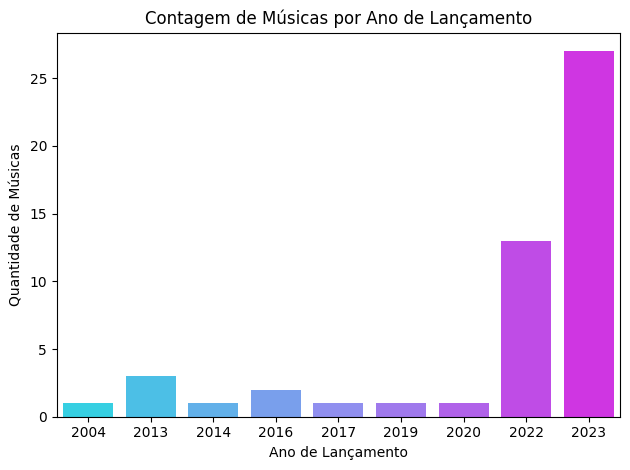

In [31]:
sns.countplot(data=df, x='ano_lancamento', palette='cool')
plt.title('Contagem de Músicas por Ano de Lançamento')
plt.ylabel('Quantidade de Músicas')
plt.xlabel('Ano de Lançamento')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Como podemos ver nesse gráfico de barras, a grande maioria das faixas mais ouvidas são recentes, datando principalmente de 2022 e 2023, comprovando a hipótese.

# Reflexões finais



*   Sobre a primeira hipótese, para incrementar a confirmação do que foi afirmado,
poderia também, na limpeza de dados, ter sido feita a análise de músicas que contêm 'pop' em gêneros secundários.
*   Sobre ambas, poderia ter sido feita a análise com uma amostra maior de músicas, por exemplo, com 200 músicas mais ouvidas, ou ainda, pegando dados de outras plataformas como Deezer, YouTube, Apple Music etc., a fim de ter uma abrangência maior para melhores decisões, definir padrões de consumo, preferência dos ouvintes e mais.

